In [1]:
import pandas as pd
import numpy as np
import os 

os.chdir(r'C:\Users\hatzi\Documents\SUTD\Security Tools Projects\STL2 - Email Spam Filtering Techniques')

## Import spam assassin data

In [2]:
spam_ass_df = pd.read_csv('spam_assasin/jose_spam_assassin.csv')
print('Length of dataset: ', len(spam_ass_df))
spam_ass_df.head()

Length of dataset:  616


,X-Dropbox-Message-ID,X-Complaints-To,X-Server,X-Authority-Analysis,x-envid,To,X-Note,X-GPG,X-Spam-Filter,Precedence,...,Iplanet-SMTP-Warning,X-Epoch,X-Lookup-Warning,X-Yahoo-Profile,X-Face-Viewer,DKIM-Signature,spam_status,spam_score,source,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,No,1.7,jose_2020_emails,spam
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,No,2.6,jose_2020_emails,spam
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,7.1,jose_2020_emails,spam
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Yes,8.1,jose_2020_emails,spam
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,No,4.1,jose_2020_emails,spam


In [3]:
# Required threshold is 5.0 (Hard coded) to be classified as spam
spam_emails = spam_ass_df[spam_ass_df['spam_status'] == 'Yes']
spam_emails['spam_score'].min()

5.0

In [4]:
# Get percentage of emails for each category
spam_ass_df[['spam_status']].value_counts()

spam_status
No             350
Yes            266
dtype: int64

In [5]:
# Check which columns have the highest correlation for spam emails
correlations = spam_emails.corr()
corr_abs = {}
corr_actual = {}
for index, row in (correlations[['spam_score']]).iterrows():
    correlation_with_spam_score = row['spam_score']
    if abs(correlation_with_spam_score) > 0.01: 
        corr_abs[index] = abs(correlation_with_spam_score)
        corr_actual[index] = (correlation_with_spam_score)
        
# Print absolute correlations sorted in decreasing order
sorted_dict = {k: v for k, v in sorted(corr_abs.items(), key=lambda item: item[1], reverse = True)}
temp_df = pd.DataFrame.from_dict(sorted_dict, orient='index')
temp_df = temp_df.rename(columns={0: 'Emails classified correctly as spam'})
temp_df.head(20)

,Emails classified correctly as spam
spam_score,1.000000
X-Sender,0.314313
Mail-Reply-To,0.314313
User-Agent,0.314313
To,0.222660
Content-Transfer-Encoding,0.213491
X-MimeOLE,0.204535
X-PHP-Script,0.197112
X-MSMail-Priority,0.174072
X-SG-EID,0.168697


In [6]:
# Check which columns have the highest correlation for non-spam emails
non_spam_emails = spam_ass_df[spam_ass_df['spam_status'] == 'No']
correlations = non_spam_emails.corr()
corr_abs = {}
corr_actual = {}
for index, row in (correlations[['spam_score']]).iterrows():
    correlation_with_spam_score = row['spam_score']
    if abs(correlation_with_spam_score) > 0.01: 
        corr_abs[index] = abs(correlation_with_spam_score)
        corr_actual[index] = (correlation_with_spam_score)
        
# Print absolute correlations sorted in decreasing order
sorted_dict = {k: v for k, v in sorted(corr_abs.items(), key=lambda item: item[1], reverse = True)}
temp_df = pd.DataFrame.from_dict(sorted_dict, orient='index')
temp_df = temp_df.rename(columns={0: 'Emails classified wrongly as non-spam'})
temp_df.head(20)

,Emails classified wrongly as non-spam
spam_score,1.000000
Sender,0.338195
X-OriginalArrivalTime,0.266934
X-Dropbox-Message-ID,0.236848
CC,0.236848
In-Reply-To,0.212929
References,0.212929
X-KSE-Attachment-Filter-Triggered-Rules,0.206574
X-KSE-Antivirus-Interceptor-Info,0.206574
X-KSE-ServerInfo,0.206574


In [7]:
# Check for correlation for all emails (spam and non-spam)
correlations = spam_ass_df.corr()
corr_abs = {}
corr_actual = {}
for index, row in (correlations[['spam_score']]).iterrows():
    correlation_with_spam_score = row['spam_score']
    if abs(correlation_with_spam_score) > 0.01: 
        corr_abs[index] = abs(correlation_with_spam_score)
        corr_actual[index] = (correlation_with_spam_score)
        
# Print absolute correlations sorted in decreasing order
sorted_dict = {k: v for k, v in sorted(corr_abs.items(), key=lambda item: item[1], reverse = True)}
temp_df = pd.DataFrame.from_dict(sorted_dict, orient='index').head(20)
temp_df = temp_df.rename(columns={0: 'All Emails'})
temp_df.head(20)

,All Emails
spam_score,1.000000
Content-Transfer-Encoding,0.298715
X-SG-EID,0.222022
Thread-Topic,0.214811
X-MS-Has-Attach,0.204123
X-MS-TNEF-Correlator,0.204123
Accept-Language,0.204123
x-originating-ip,0.185866
Thread-Index,0.184916
Content-Language,0.183915


In [8]:
# Get accuracy score spam assassin
accuracy = len(spam_ass_df[spam_ass_df['spam_status'] == 'Yes']) / len(spam_ass_df)
print('Spam Assassin accuracy:', accuracy)

Spam Assassin accuracy: 0.4318181818181818


In [9]:
# Fit gradient boosting tree to predict spam scores

# evaluate gradient boosting algorithm for classification
from numpy import std, mean
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

X = spam_ass_df.drop(['spam_status', 'spam_score', 'source', 'class'], axis=1)
y = spam_ass_df[['spam_score']]
model = GradientBoostingRegressor()

# Train the model
model.fit(X, y.values.ravel())

GradientBoostingRegressor()

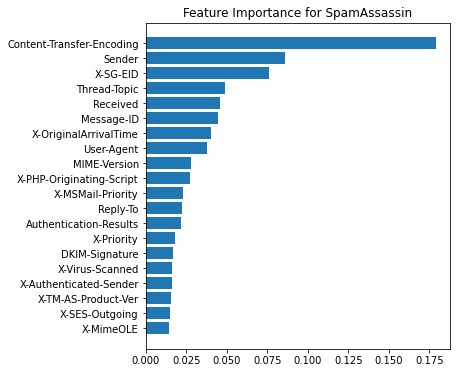

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos[-20:,], feature_importance[sorted_idx][-20:,], align='center')
plt.yticks(pos[-20:,], np.array(X.columns)[sorted_idx][-20:,])
plt.title('Feature Importance for SpamAssassin')
plt.show()

spam_ass_impt_headers = np.array(X.columns)[sorted_idx][-20:,]

## Load rspam data

In [11]:
rspam_df = pd.read_csv('rspam/jose_2020_rspam.csv')
rspam_df = rspam_df.append(pd.read_csv('rspam/jose_2019_rspam.csv'))
rspam_df = rspam_df.append(pd.read_csv('rspam/jose_2018_rspam.csv'))

print('rpsam dataset length:', len(rspam_df))
rspam_df.head()

rpsam dataset length: 669


,X-Dropbox-Message-ID,X-Authority-Analysis,x-envid,To,X-Wum-Nature,Precedence,X-StarScan-Version,X-REPORT-ABUSE-TO,X-Originating-IP,X-CanItPRO-Stream,...,X-Authentication-Warning,X-Cloudmilter-Processed,X-Antispam-Training-Forget,List-Unsubscribe,X-Mailer-RecptId,X-Lookup-Warning,X-Outgoing-Spam-Report,DKIM-Signature,spam_status,spam_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,8.40
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,5.79
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,8.30
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,6.30
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,10.05


In [12]:
# Print accuracy
accuracy = len(rspam_df[rspam_df['spam_status'] == True]) / len(rspam_df)
print('Rspam accuracy:', accuracy)

Rspam accuracy: 0.4469357249626308


In [13]:
# Get correlation for email classified correctly as spam
spam_emails = rspam_df[rspam_df['spam_status'] == True]
correlations = spam_emails.corr()
corr_abs = {}
corr_actual = {}
for index, row in (correlations[['spam_score']]).iterrows():
    correlation_with_spam_score = row['spam_score']
    if abs(correlation_with_spam_score) > 0.01: 
        corr_abs[index] = abs(correlation_with_spam_score)
        corr_actual[index] = (correlation_with_spam_score)
        
# Print absolute correlations sorted in decreasing order
sorted_dict = {k: v for k, v in sorted(corr_abs.items(), key=lambda item: item[1], reverse = True)}
temp_df = pd.DataFrame.from_dict(sorted_dict, orient='index')
temp_df = temp_df.rename(columns={0: 'Emails classified correctly as spam'})
temp_df.head(20)

,Emails classified correctly as spam
spam_score,1.000000
X-MimeOLE,0.363561
X-MSMail-Priority,0.332385
X-Priority,0.235952
Priority,0.234193
X-PHP-Originating-Script,0.220233
Message-ID,0.205854
Importance,0.197362
Reply-To,0.194167
List-Unsubscribe,0.171176


In [14]:
# Get correlation for email classified wrongly as not-spam
not_spam_emails = rspam_df[rspam_df['spam_status'] == False]
correlations = not_spam_emails.corr()
corr_abs = {}
corr_actual = {}
for index, row in (correlations[['spam_score']]).iterrows():
    correlation_with_spam_score = row['spam_score']
    if abs(correlation_with_spam_score) > 0.01: 
        corr_abs[index] = abs(correlation_with_spam_score)
        corr_actual[index] = (correlation_with_spam_score)
        
# Print absolute correlations sorted in decreasing order
sorted_dict = {k: v for k, v in sorted(corr_abs.items(), key=lambda item: item[1], reverse = True)}
temp_df = pd.DataFrame.from_dict(sorted_dict, orient='index')
temp_df = temp_df.rename(columns={0: 'Emails classified wrongly as not spam'})
temp_df.head(20)

,Emails classified wrongly as not spam
spam_score,1.000000
X-Api-Host,0.509068
Recipient-Id,0.509068
X-BounceEmailVersion,0.509068
X-Email-Rejection-Mode,0.509068
Site-Id,0.509068
X-Debug,0.509068
X-OriginalArrivalTime,0.364793
Sender,0.293727
In-Reply-To,0.198988


In [15]:
# Fit a gradient boosting regressor model
X = rspam_df.drop(['spam_status', 'spam_score'], axis = 1)
y = rspam_df[['spam_score']]

# Train the model
model = GradientBoostingRegressor()
model.fit(X, y.values.ravel())

GradientBoostingRegressor()

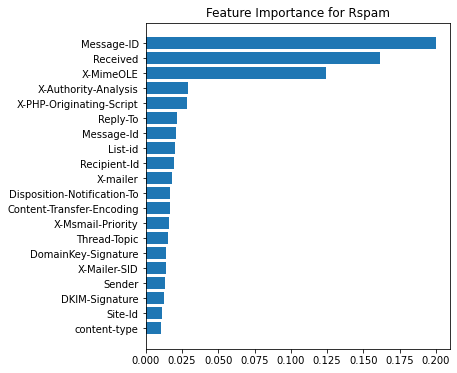

In [16]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos[-20:,], feature_importance[sorted_idx][-20:,], align='center')
plt.yticks(pos[-20:,], np.array(X.columns)[sorted_idx][-20:,])
plt.title('Feature Importance for Rspam')
plt.show()

rspam_impt_headers = np.array(X.columns)[sorted_idx][-20:,]

## Extract email headers that are important

In [18]:
rspam_impt_headers

array(['content-type', 'Site-Id', 'DKIM-Signature', 'Sender',
       'X-Mailer-SID', 'DomainKey-Signature', 'Thread-Topic',
       'X-Msmail-Priority', 'Content-Transfer-Encoding',
       'Disposition-Notification-To', 'X-mailer', 'Recipient-Id',
       'List-id', 'Message-Id', 'Reply-To', 'X-PHP-Originating-Script',
       'X-Authority-Analysis', 'X-MimeOLE', 'Received', 'Message-ID'],
      dtype=object)

In [19]:
spam_ass_impt_headers

array(['X-MimeOLE', 'X-SES-Outgoing', 'X-TM-AS-Product-Ver',
       'X-Authenticated-Sender', 'X-Virus-Scanned', 'DKIM-Signature',
       'X-Priority', 'Authentication-Results', 'Reply-To',
       'X-MSMail-Priority', 'X-PHP-Originating-Script', 'MIME-Version',
       'User-Agent', 'X-OriginalArrivalTime', 'Message-ID', 'Received',
       'Thread-Topic', 'X-SG-EID', 'Sender', 'Content-Transfer-Encoding'],
      dtype=object)

In [20]:
import email
import email.policy

os.chdir(r'G:\My Drive\Academics\SUTD\Security Tools Lab 2\Projects\P4 - Email Spam\dataset')

In [23]:
def load_jose_dataset(filename): 
    
    # Read raw email lines
    email_list = []
    with open(filename, 'r', encoding="utf8") as f:
        current_email = []
        for line in f: 
            
            # Start of a new email
            if line.startswith("From jose@monkey.org"):
                
                # Store previous email
                email_list.append(current_email)
                
                # Start a new email
                current_email = []
                current_email.append(line)
            else: 
                
                # continue storing current email
                current_email.append(line)
                
    # Convert raw emails to Python email object
    # Parse email data into an email object 
    email_obj_list = []
    for single_email in email_list: 
        
        try: 
        
            # Write content to disk 
            with open('email.txt', 'w') as f:
                for item in single_email:
                    f.write("%s" % item)

            # Read in content to email object 
            with open('email.txt', 'rb') as f:
                email_obj = email.parser.BytesParser(policy = email.policy.default).parse(f)

            email_obj_list.append(email_obj)
        
        except Exception as e:
            pass
    
    return email_obj_list

In [29]:
# Read in the 3 Jose's datasets
jose_2020_emails = load_jose_dataset('phishing-2020')
jose_2019_emails = load_jose_dataset('phishing-2019')
jose_2018_emails = load_jose_dataset('phishing-2018')  
jose_emails = jose_2020_emails + jose_2019_emails + jose_2018_emails

In [53]:
impt_headers = [header for header in spam_ass_impt_headers] + [header for header in rspam_impt_headers]

In [54]:
header_dict = dict.fromkeys(impt_headers , None)

for single_email in jose_emails: 
        try:   
            email_items = single_email.items()
            for tuple_obj in email_items: 
                header = (tuple_obj[0])
                header_value = (tuple_obj[1])
                
                if header in header_dict:
                    header_dict[header] = header_value
                
        except Exception as e:
            pass

In [58]:
for key in header_dict:
    print("{}: {}".format(key, header_dict[key]))

X-MimeOLE: Produced By Microsoft MimeOLE V6.3.9600.19203
X-SES-Outgoing: 2019.08.20-54.240.6.53
X-TM-AS-Product-Ver: IMSVA-8.2.0.1391-7.5.0.1017-20482.004
X-Authenticated-Sender: ml002.dnshigh.com: mailing@ml.ussnews.net
X-Virus-Scanned: by amavisd-new using ClamAV (18)
DKIM-Signature: v=1; a=rsa-sha256; q=dns/txt; c=relaxed/relaxed;	d=ml.ussnews.net; s=default; h=Content-Type:MIME-Version:Message-ID:Date:	Subject:To:From:Sender:Reply-To:Cc:Content-Transfer-Encoding:Content-ID:	Content-Description:Resent-Date:Resent-From:Resent-Sender:Resent-To:Resent-Cc	:Resent-Message-ID:In-Reply-To:References:List-Id:List-Help:List-Unsubscribe:	List-Subscribe:List-Post:List-Owner:List-Archive;	bh=rsKw8amTFCxR3yhSjuHJ/o7QsWPzx6bY4psPWR7J3qk=; b=HFl30BSGe1F4uIC7KcZ8O6jGo9	XSu/9YTvINQgN+bimy5ck7yaDtixE0cWu1lGBP5775Cghn0a7cx/PT8ewuC884jAeCwDq+Ssag68Q	O+jePBaG5ICIgpD1S2pjUrf2UdkReur5WmneObFemOdnSxVegdb1J4e+iAG/HQ88K0vlbbQzjfsOC	O2P4sZgT4pMoghTv6slOOC55NcKwDsQRE75pps6AHLu6/6RQbdzcHBCcW4Koxn6l0DswoCMddmaBZ